In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import keras
import shutil
import random
import warnings
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from keras.utils import image_dataset_from_directory

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
# Reproducability
tf.keras.utils.set_random_seed(101)

In [ ]:
# Creating a list of directories of all image categories in /kaggle/input/

waste_type_dir = []
for (root, dirs, files) in os.walk('drive/MyDrive/Colab Notebooks'):
    if root.split('/')[-3:-1] == ['images', 'images']:
        waste_type_dir.append(root)
waste_type_dir.sort()
waste_type_dir

['drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/aerosol_cans',
 'drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/aluminum_food_cans',
 'drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/aluminum_soda_cans',
 'drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/cardboard_boxes',
 'drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/cardboard_packaging',
 'drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/clothing',
 'drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/coffee_grounds',
 'drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/disposable_plastic_cutlery',
 'drive/MyDrive/Colab Notebooks/Recyclable and Household Waste Classification/images/images/eggshells',
 'driv

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/working/training-images/'
valid_dir = '/content/drive/MyDrive/Colab Notebooks/working/validation-images/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/working/test-images/'

In [ ]:
# Creating the directories for training and test images and also creating sub-directories of each waste category

for x in waste_type_dir:
    os.makedirs(train_dir + x.split('/')[-1], exist_ok=True)
    os.makedirs(valid_dir + x.split('/')[-1], exist_ok=True)
    os.makedirs(test_dir + x.split('/')[-1], exist_ok=True)

In [ ]:
# Creating a dataframe of waste categories and the corressponding number of images in each category

num_images_dict = {'waste_category': [x.split('/')[-1] for x in waste_type_dir],
             'num_images': [(len(os.listdir(x + '/default')) + len(os.listdir(x + '/real_world'))) for x in waste_type_dir],
             'num_default_images': [len(os.listdir(x + '/default')) for x in waste_type_dir],
             'num_real_world_images': [len(os.listdir(x + '/real_world')) for x in waste_type_dir]}

num_images_df = pd.DataFrame.from_dict(num_images_dict)
num_images_df

,waste_category,num_images,num_default_images,num_real_world_images
0,aerosol_cans,500,250,250
1,aluminum_food_cans,500,250,250
2,aluminum_soda_cans,500,250,250
3,cardboard_boxes,500,250,250
4,cardboard_packaging,500,250,250
5,clothing,500,250,250
6,coffee_grounds,500,250,250
7,disposable_plastic_cutlery,500,250,250
8,eggshells,500,250,250
9,food_waste,500,250,250


In [ ]:
# Visualizing the dataframe

fig = px.bar(num_images_df, x='waste_category', y=['num_default_images', 'num_real_world_images'], color='waste_category')
fig.update_layout(bargap=0.25)
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
# Function for plotting 4 random images from a folder

def plot_random_images_from_directory(directory_path):

    all_files = os.listdir(directory_path)

    if len(all_files) < 1:
        print("Not enough images in the directory to display.")
        return

    selected_images = random.sample(all_files, 1)
    fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=150)

    image_path = os.path.join(directory_path, selected_images[0])
    img = mpimg.imread(image_path)
    ax.imshow(img)
    ax.axis('off')

    class_name = os.path.basename(directory_path)
    fig.suptitle(directory_path.split('/')[-2] + ': ' + class_name, fontsize=16)
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualizing four random default and real_world images of every waste category

for directory in waste_type_dir:
    plot_random_images_from_directory(directory + '/default')
    plot_random_images_from_directory(directory + '/real_world')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Creating a list of all image paths in /kaggle/input/

file_paths = []
for directory in waste_type_dir:
    for root, dirs, files in os.walk(directory):
        if root.split('/')[-1] == 'default' or root.split('/')[-1] == 'real_world':
            paths = os.listdir(root)
            for path in paths:
                file_paths.append(os.path.join(root, path))
file_paths.sort()
len(file_paths), len(set(file_paths)) # Checking if the list was generated correctly

(15000, 15000)

In [ ]:
# Copyling all the images to the sub-directories of /kaggle/working/training-images/ according to their waste category

for src in file_paths:
    fn = src.split('/')[-1]
    dst = train_dir + src.split('/')[-3] + '/'
    if fn not in os.listdir(dst):
        shutil.copy(src, dst)
    elif fn in os.listdir(dst):
        number_str = fn.split('_')[-1].split('.')[0].split(' ')[0]  # Split on space and take the first part
        new_fn = 'Image_' + str(250 + int(number_str)) + '.png'
        shutil.copy(src, dst + new_fn)

print("All images are copied.")

All images are copied.


In [ ]:
# Function for checking if the number of images in a directory is correct

def num_images(directory, img_per_dir):
    num_images = 0
    for root, dirs, files in os.walk(directory):
        if root.split('/')[-1] != directory:
            # Count only image files (assuming .jpg or .png extensions)
            image_files = [f for f in os.listdir(root) if f.lower().endswith(('.png', '.jpg'))]
            if len(image_files) != img_per_dir:
                num_images += len(image_files)
                print(f"All images were not moved properly from {root}")
                break
            elif len(image_files) == img_per_dir:
                num_images += len(image_files)

    return num_images

In [ ]:
def count_images_in_directory(directory):
    """Counts the number of images in a directory and its subdirectories."""

    total_images = 0
    for root, dirs, files in os.walk(directory):
        num_images_in_subdir = len([f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"Number of images in {root}: {num_images_in_subdir}")
        total_images += num_images_in_subdir

    print(f"Total images in '{directory}': {total_images}")

# Call the function to count images in the training directory
count_images_in_directory('/content/drive/MyDrive/Colab Notebooks/working/training-images')

Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images: 0
Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images/aerosol_cans: 500
Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images/aluminum_food_cans: 500
Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images/aluminum_soda_cans: 500
Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images/cardboard_boxes: 500
Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images/cardboard_packaging: 500
Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images/clothing: 500
Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images/coffee_grounds: 500
Number of images in /content/drive/MyDrive/Colab Notebooks/working/training-images/disposable_plastic_cutlery: 500
Number of images in /content/drive/MyDrive/Colab Notebooks/working/train

In [ ]:
# Checking if all the images were copied to the training directory
print(num_images(directory='training-images', img_per_dir=500))

0


In [ ]:
# Moving 50 images of each waste category from the training-images directory to the validation-images and test-images directory

for root, dirs, files in os.walk('/content/drive/MyDrive/Colab Notebooks/working/training-images'):
    if root.split('/')[-1] != 'training-images':
        for i in range(50):
            src_path_test = os.path.join(root, random.choice(os.listdir(root)))
            dst_path_test = '/content/drive/MyDrive/Colab Notebooks/working/test-images/' + root.split('/')[-1]
            shutil.move(src_path_test, dst_path_test)
            src_path_valid = os.path.join(root, random.choice(os.listdir(root)))
            dst_path_valid = '/content/drive/MyDrive/Colab Notebooks/working/validation-images/' + root.split('/')[-1]
            shutil.move(src_path_valid, dst_path_valid)

In [ ]:
# Checking if all the images were moved properly
print(num_images('training-images', 400))
print(num_images('validation-images', 50))
print(num_images('test-images', 50))

0
0
0


In [ ]:
def count_images(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png')):
                total_images += 1
    return total_images

# Example usage:
folder_path = 'training-images'
num_images = count_images(folder_path)
print(f"Total images in '{folder_path}': {num_images}")

Total images in 'training-images': 0


In [ ]:
# Creating a data augmentation model

data_augmentation = keras.Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.4, 0.4),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

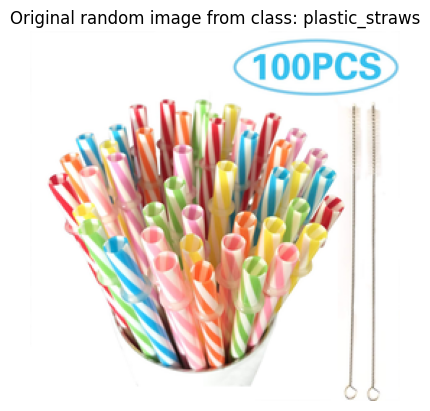

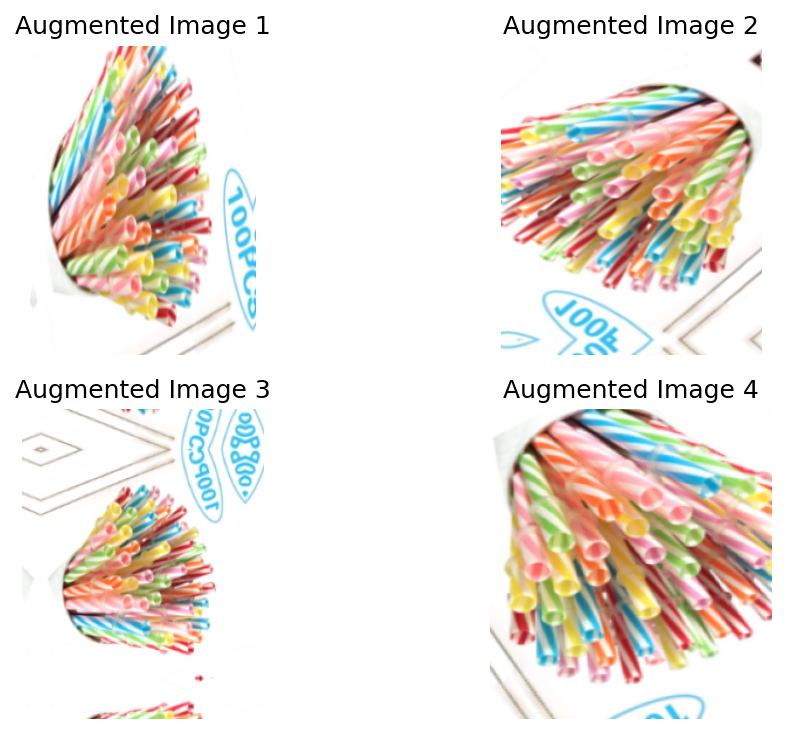

In [45]:
target_class = random.choice(os.listdir('/content/drive/MyDrive/Colab Notebooks/working/training-images'))
target_dir = train_dir + "/" + target_class

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# plot the original image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

# Plot the augmented images
fig, axes = plt.subplots(2, 2, figsize=(8, 5), dpi=150)

for i in range(2):
    for j in range(2):
        augmented_image = data_augmentation(img, training=True)
        axes[i, j].imshow(augmented_image)
        axes[i, j].axis('off')
        axes[i, j].set_title(f'Augmented Image {i*2 + j + 1}')

plt.tight_layout()
plt.show()

In [46]:
# Function to build image datasets from a directory

def build_img_dataset(directory, BATCH_SIZE, SEED, class_names=False):
    dataset = image_dataset_from_directory(directory=directory,
                                           batch_size=BATCH_SIZE,
                                           label_mode='categorical',
                                           seed=SEED)

    class_names = dataset.class_names if class_names else None
    dataset = dataset.cache().prefetch(tf.data.AUTOTUNE)

    return (dataset, class_names if class_names else None)

In [47]:
train_data = build_img_dataset(train_dir, 128, 101)[0]
valid_data = build_img_dataset(valid_dir, 128, 101)[0]
test_data, test_classes = build_img_dataset(test_dir, 128, 101, class_names=True) # will need test_classes in visualizing predictions

Found 12000 files belonging to 30 classes.
Found 1500 files belonging to 30 classes.
Found 1500 files belonging to 30 classes.


In [48]:
base_model = tf.keras.applications.EfficientNetV2L(
    include_top=False,
    input_shape=(256, 256, 3),
    pooling='avg',
    include_preprocessing=True
)

473176280/473176280 [==============================] - 2s 0us/step


In [49]:
base_model.trainable = False
for layer in base_model.layers[-5:]:
    layer.trainable=True

data_augmentation = keras.Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.4, 0.4),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
])

inputs = tf.keras.layers.Input(shape=(None, None, 3))
resize = tf.keras.layers.Resizing(height=256, width=256, interpolation='lanczos5')(inputs)
x = data_augmentation(resize)
x = base_model(x, training=False) # put the base_model in inference mode
outputs = tf.keras.layers.Dense(len(test_classes),
                        activation='softmax',
                        name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.AdamW(),
    metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 resizing (Resizing)         (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetv2-l (Function  (None, 1280)              117746848 
 al)                                                             
                                                                 
 output_layer (Dense)        (None, 30)                38430     
                                                                 
Total params: 117785278 (449.32 MB)
Trainable params: 38430 (150.12 KB)
Non-trainable params: 117746848 (449.17 MB)
___________

In [50]:
# Creating an earlystopping callback

earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=2,
    verbose=1,
    mode='min',
    restore_best_weights=True,
)

In [51]:
tf.config.optimizer.set_experimental_options({'layout_optimizer': False})

history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=10,
                    verbose=1,
                    callbacks=[earlystopping])

Epoch 1/10
94/94 [==============================] - 1237s 13s/step - loss: 2.4533 - accuracy: 0.4269 - val_loss: 1.5555 - val_accuracy: 0.6353
Epoch 2/10
94/94 [==============================] - 1242s 13s/step - loss: 1.5960 - accuracy: 0.5969 - val_loss: 1.1849 - val_accuracy: 0.6887
Epoch 3/10
94/94 [==============================] - 1288s 14s/step - loss: 1.3595 - accuracy: 0.6328 - val_loss: 1.0420 - val_accuracy: 0.7173
Epoch 4/10
94/94 [==============================] - 1314s 14s/step - loss: 1.2430 - accuracy: 0.6541 - val_loss: 0.9683 - val_accuracy: 0.7280
Epoch 5/10
94/94 [==============================] - 1305s 14s/step - loss: 1.1573 - accuracy: 0.6749 - val_loss: 0.9152 - val_accuracy: 0.7320
Epoch 6/10
94/94 [==============================] - 1318s 14s/step - loss: 1.1070 - accuracy: 0.6873 - val_loss: 0.8744 - val_accuracy: 0.7367
Epoch 7/10
94/94 [==============================] - 1369s 15s/step - loss: 1.0589 - accuracy: 0.6991 - val_loss: 0.8412 - val_accuracy: 0.7487

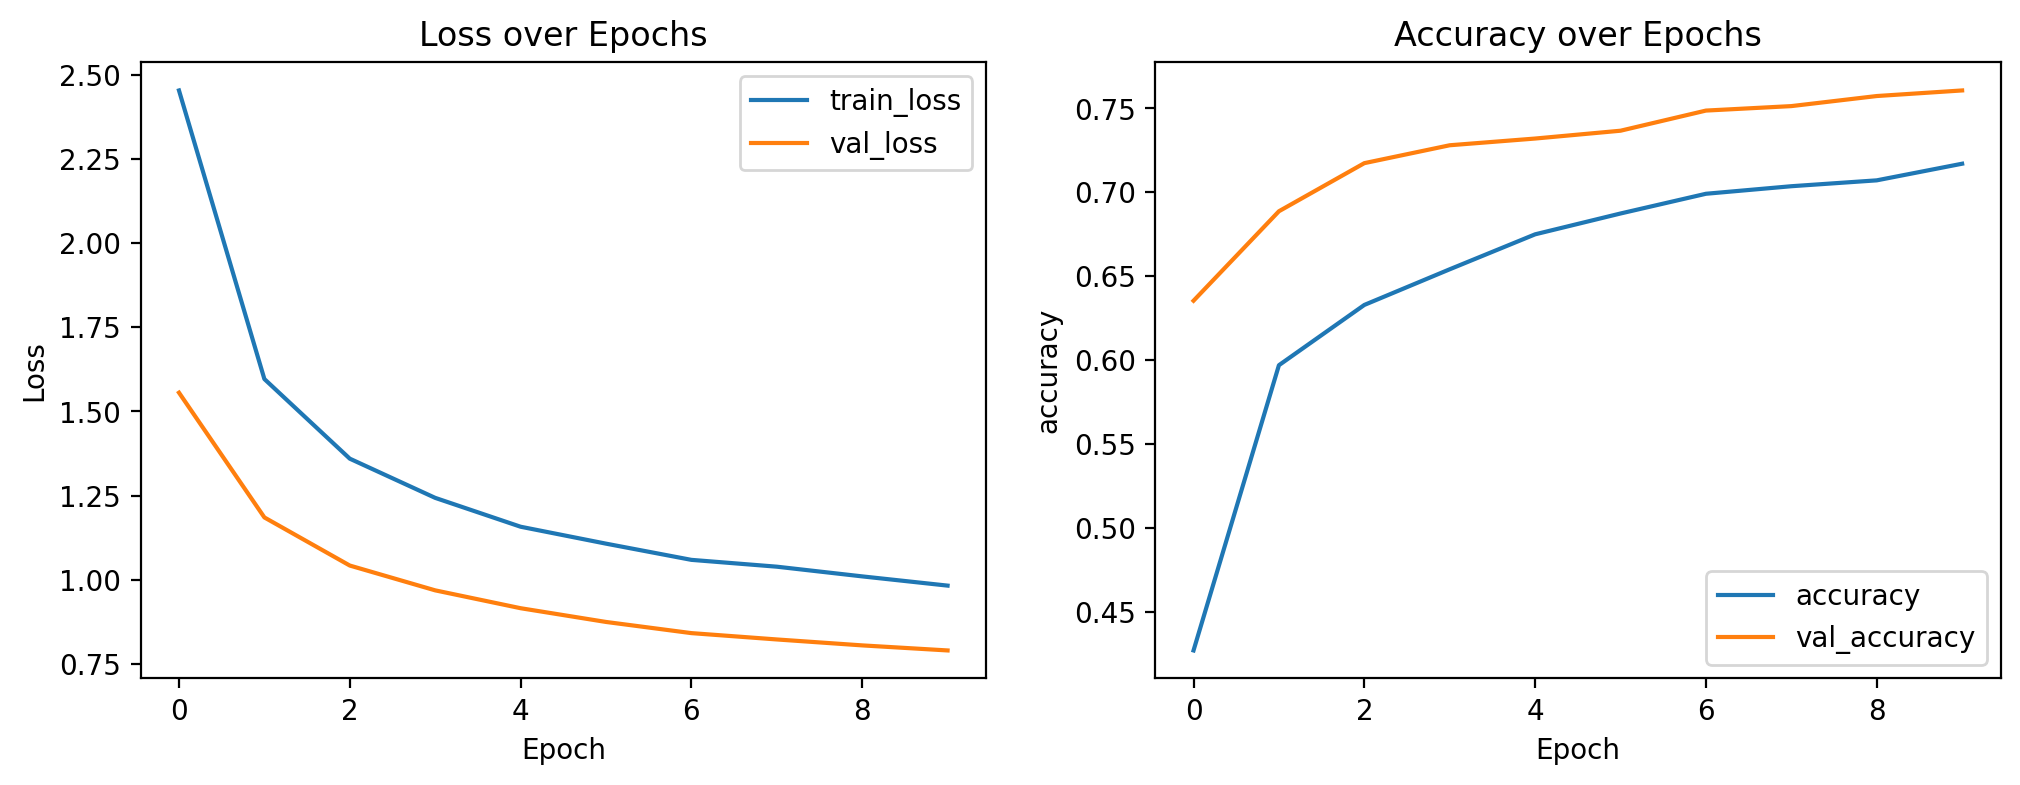

In [52]:
plt.figure(figsize=(12, 4), dpi=200)
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show();

In [53]:
loss, accuracy = model.evaluate(test_data)
print(f"The model loss on the test dataset is {round(loss, 4)}.")
print(f"The model accuracy on the test dataset is {round(accuracy, 2)*100}%.")

12/12 [==============================] - 128s 10s/step - loss: 0.8297 - accuracy: 0.7640
The model loss on the test dataset is 0.8297.
The model accuracy on the test dataset is 76.0%.


1/1 [==============================] - 6s 6s/step


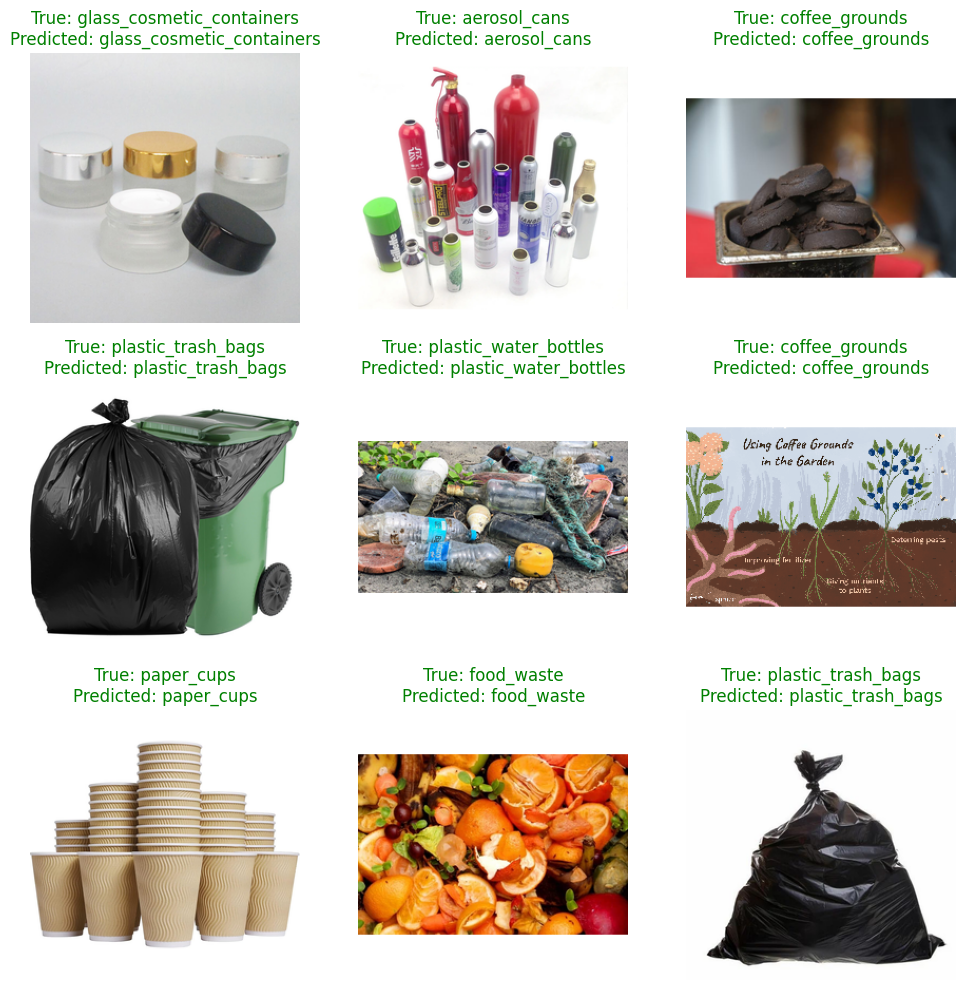

In [54]:
# Function to display a grid of images with predictions and true labels
def display_images_with_predictions_and_true_labels(dataset, model, test_classes, num_images=9):
    plt.figure(figsize=(10, 10))

    # Take a batch from the dataset and select random images
    for images, labels in dataset.take(1):
        indices = np.random.choice(images.shape[0], num_images, replace=False)
        random_images = images.numpy()[indices]
        true_labels = labels.numpy()[indices]

        # Convert true labels to integer indices if they are one-hot encoded
        if len(true_labels.shape) > 1:
            true_labels = np.argmax(true_labels, axis=1)

        predictions = model.predict(random_images)
        predicted_labels = np.argmax(predictions, axis=1)

        for i in range(num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(random_images[i].astype("uint8"))
            if true_labels[i] == predicted_labels[i]:
                color = 'green'
            else:
                color = 'red'
            plt.title(f"True: {test_classes[true_labels[i]]}\nPredicted: {test_classes[predicted_labels[i]]}",
                      color=color)
            plt.axis("off")

    plt.tight_layout()
    plt.show()

display_images_with_predictions_and_true_labels(test_data, model, test_classes)